In [68]:
from skimage import feature
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
!nvidia-smi

Mon Sep  7 19:25:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:24:00.0 Off |                  N/A |
| 41%   36C    P8    18W / 260W |      1MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 1.5MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


In [51]:
!pip install opencv-rolling-ball

  Using cached opencv-rolling-ball-1.0.1.tar.gz (6.2 kB)
     |████████████████████████████████| 49.4 MB 4.6 MB/s eta 0:00:01     |████████████████                | 24.8 MB 746 kB/s eta 0:00:33
  Created wheel for opencv-rolling-ball: filename=opencv_rolling_ball-1.0.1-py3-none-any.whl size=6893 sha256=b9e2e3f2068580e9625e392e1fd7516cdd804af3e054fa323dc7fcd22169887b
  Stored in directory: /home/fur/.cache/pip/wheels/e0/82/36/b4f5e554852cc4b51953a52d1898ea23755d566729f5fea31e
Successfully built opencv-rolling-ball


In [52]:
image_raw = cv2.imread('02_80-100s__crop256px_5_5.bmp')
image_gb = cv2.GaussianBlur(image_raw,(5,5), cv2.BORDER_DEFAULT)

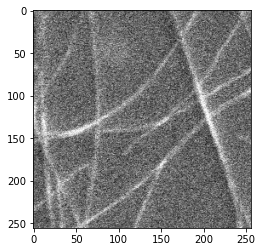

In [53]:
plt.imshow(image_raw)
plt.show()

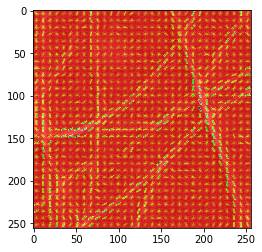

In [54]:
#hog
(hog, hog_image) = feature.hog(image_gb, orientations=9, 
                    pixels_per_cell=(8, 8), cells_per_block=(4, 4), 
                    block_norm='L2-Hys', visualize=True, transform_sqrt=True)

plt.imshow(image_raw)
plt.imshow(hog_image,alpha=0.7, cmap='hsv')


plt.show()
#plt.imwrite('hog_gb.jpg', hog_image*255)

In [55]:
from cv2_rolling_ball import subtract_background_rolling_ball

In [85]:
image_subtbg = cv2.cvtColor(image_raw, cv2.COLOR_BGR2GRAY)

In [86]:
type(image_subtbg)

numpy.ndarray

In [87]:
image_subtbg.shape

(256, 256)

In [88]:
cv2.imwrite('tmpgray.jpg', image_subtbg)

True

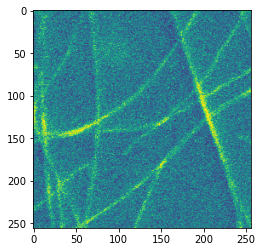

In [89]:
plt.imshow(image_subtbg)
plt.show()

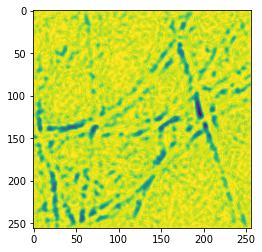

In [102]:
image_subtbg, background = subtract_background_rolling_ball(image_subtbg, 128, light_background=True, use_paraboloid=True, do_presmooth=False)
plt.imshow(image_subtbg)
plt.show()

In [103]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

In [104]:
# Convert to float: Important for subtraction later which won't work with uint8
image_f = img_as_float(image_raw)
image = gaussian_filter(image_f, 2.5)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

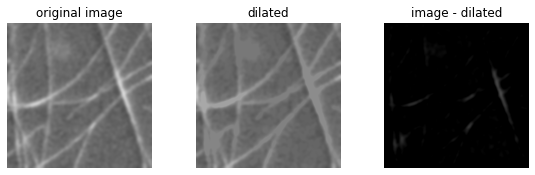

In [105]:
# filtering regional maxima
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
#ax1.imshow(dilated,vmin=0,vmax=255,cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
subt=image-dilated
ax2.imshow(subt, vmin=subt.min(), vmax=subt.max(), cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
fig.savefig('image-dilated.png')

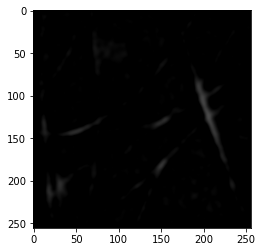

In [106]:
plt.imshow(subt, cmap = 'jet')
plt.show()

In [107]:
subt_ubyte = img_as_ubyte(subt)

In [108]:
subt_ubyte

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
subt_ubyte.max()

75

In [12]:
type(subt_ubyte)

numpy.ndarray

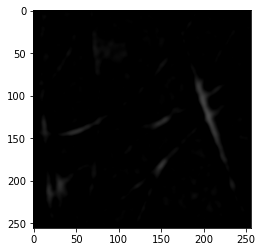

In [13]:
plt.imshow(subt_ubyte, cmap = 'jet')
plt.show()

In [14]:
h = image.min()
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

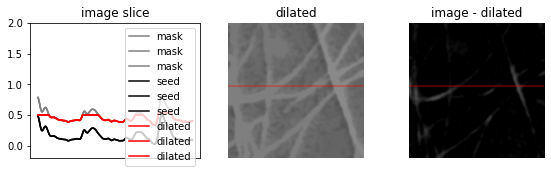

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 120

ax0.plot(mask[yslice], '0.5', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=0.4)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()